<a href="https://colab.research.google.com/github/Femonello/bootcamp-data-analytics/blob/main/Desafio_Final_Estatistica_Freq_e_Medidas_Fernanda_Monello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Final - Estatatistica Frequências e Medidas**

Análise de base de dados enem.

**Objetivo** é retirar informações da basede dados do enem do ano anterior para alinhar melhor as estratégias docursinho para cada estudante.

In [1]:
#importação das bibliotecas base
import pandas as pd
import numpy as np

#bibliotecas de visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

#biblicotecas estatíticas
import scipy.stats as stat


In [2]:
#mount arquivo do drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#Leitura dos arquivo
df = pd.read_json('/content/drive/MyDrive/Womakers - Datasets/enem_2023.json')
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [4]:
#Tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [5]:
# Contar registros nulos em cada coluna
null_counts = df.isnull().sum()
null_counts


,0
Linguagens,103
Ciências humanas,64
Ciências da natureza,176
Matemática,76
Redação,140
Sexo,0


## **Questões**



In [6]:
# exibindo informações estatísticas para o dataframe e adicionando calculo de amplituda
def novo_describe(df):
  dfTemp = df.describe()
  dfTemp.loc['amplitude'] = dfTemp.loc['max'] - dfTemp.loc['min']
  return dfTemp

In [7]:
novo_describe(df)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000
amplitude,517.456317,474.019695,487.604568,488.077902,729.160035


### 1. Qual das disciplinas tem a maior amplitude de nota?



In [8]:
#identificando a matéria com maior amplitude e o respectivo resultado

max_amplitude_value = novo_describe(df).loc['amplitude'].max()
max_amplitude_disciplina = novo_describe(df).loc['amplitude'].idxmax()
print(f"A disciplina com a maior amplitude é {max_amplitude_disciplina} com {max_amplitude_value}")

A disciplina com a maior amplitude é Redação com 729.1600351395


###  2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos osvalores nulos quando considerar a mediana)


A mediana está representada pelo quartil 50% na saída da função describe(). O Pandas, por padrão, ignora os valores nulos ao calcular estatísticas descritivas, como média, mediana e desvio padrão, considerando apenas os valores não nulos da coluna.

Podemos verificar essa informação através do calculo abaixo:

In [9]:
# verificando media e mediana de dados não nulos

media_por_disciplina = df.mean(numeric_only=True)
mediana_por_disciplina = df.median(numeric_only=True)

print("Média por disciplina:")
print(media_por_disciplina)

print("\nMediana por disciplina:")
print(mediana_por_disciplina)

Média por disciplina:
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

Mediana por disciplina:
Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64


### 3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:



* Redação - 2
* Matemática e suas Tecnologias - 4
* Linguagens, Códigos e suas Tecnologias - 2
* Ciências Humanas e suas Tecnologias - 1
* Ciências da Natureza e suas Tecnologias - 1
  
  Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [10]:
# Primeiro passo será remover os registros ausentes

#df= df.dropna().copy()

# criar uma coluna aplicando o peso das notas e a média ponderada dessas notas

df['media_ponderada'] = (df['Redação'] * 2 + df['Matemática'] * 4 + df['Linguagens'] * 2 + df['Ciências humanas'] * 1 + df['Ciências da natureza'] * 1) / 10

# Ordenar o DataFrame pela coluna 'media_ponderada' em ordem decrescente
df = df.sort_values(by='media_ponderada', ascending=False)


# Selecionar os 500 melhores estudantes e armazenando no top500 drataframe
top500 = df.head(500)
top500


,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,media_ponderada
25,604.825455,447.532353,523.041011,727.181224,870.464077,Mulher,682.987732
824,533.812379,611.760520,494.994598,807.877902,697.570213,Não idenficado,680.103191
702,551.398112,637.818208,451.624683,803.769938,652.669636,Homem,671.265814
129,583.015454,434.261543,588.516699,687.621711,852.273821,Mulher,664.384364
60,498.394660,668.355060,457.371963,760.136151,711.458481,Mulher,658.597791
...,...,...,...,...,...,...,...
400,515.892318,398.431513,440.731835,522.484700,478.946903,Homem,491.878059
160,539.397184,608.405447,314.400000,507.648230,440.950905,Mulher,491.409454
529,416.114140,438.110249,429.881954,462.605411,679.843696,Mulher,491.032952
386,537.838737,570.471430,584.935736,437.841844,459.122741,Homem,490.069750


In [11]:
#Calculando a média e o desvio padrão

media_top500 = top500['media_ponderada'].mean()
desvio_padrao_top500 = top500['media_ponderada'].std()

#Exibindo resultado
print(f"Desvio padrão das notas dos 500 estudantes mais bem colocados considerando os critérios: {desvio_padrao_top500:.2f}")
print(f"Média das notas dos 500 estudantes mais bem colocados considerando os critérios: {media_top500:.2f}")



Desvio padrão das notas dos 500 estudantes mais bem colocados considerando os critérios: 40.44
Média das notas dos 500 estudantes mais bem colocados considerando os critérios: 557.29


### 4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [12]:
#Considerando todos os estudantes do DataFrame top500

aprovadosCienciaDaComputacao = top500.head(40)

#calculando a variancia das notas
variancia_aprovadosCienciaDaComputacao = aprovadosCienciaDaComputacao['media_ponderada'].var()

#calculando a média
media_aprovadosCienciaDaComputacao = aprovadosCienciaDaComputacao['media_ponderada'].mean()

#exibindo resultados

print(f"A variância das notas dos estudantes que seriam aprovados no curso de ciência da computação é: {variancia_aprovadosCienciaDaComputacao:.2f}")
print(f"A média das notas dos estudantes que seriam aprovados no curso de ciência da computação é: {media_aprovadosCienciaDaComputacao:.2f}")

A variância das notas dos estudantes que seriam aprovados no curso de ciência da computação é: 295.77
A média das notas dos estudantes que seriam aprovados no curso de ciência da computação é: 636.68


### 5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [13]:

q3math = df['Matemática'].quantile(0.75)
q3lang = df['Linguagens'].quantile(0.75)

# exibindo valores
print(f"O valor do teto do terceiro quartil para as disciplinas de matemática é: {q3math}")
print(f"O valor do teto do terceiro quartil para as disciplinas de linguagens é: {q3lang}")


O valor do teto do terceiro quartil para as disciplinas de matemática é: 592.9129628887
O valor do teto do terceiro quartil para as disciplinas de linguagens é: 571.6358759278


### 6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique senão assimétricas?

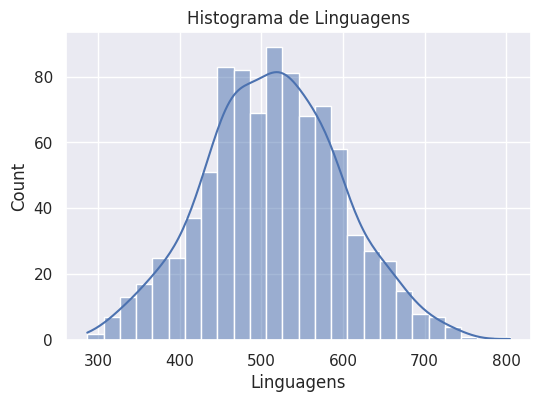

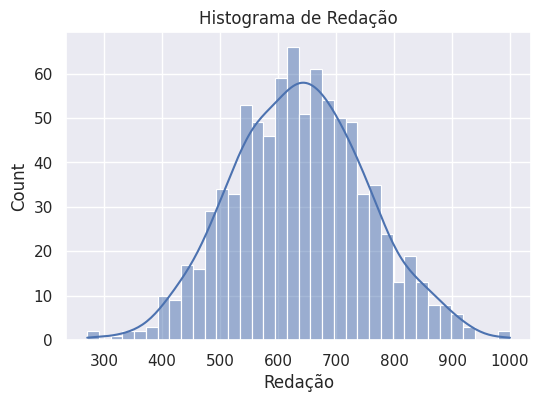

In [14]:
# histograma

plt.rcParams['figure.figsize'] = [6,4] #definindo o tamanho da figura através do dicionário global do Matplotlib
sns.set_theme() # configurando o tema visual dos gráficos gerados pelo Seaborn

disciplinas = ['Redação', 'Linguagens']

# Selecionando colunas numéricas somente das disciplinas selecionadas
colunas_selecionadas = [col for col in df.select_dtypes(include=np.number).columns if col in disciplinas]

for colunas in colunas_selecionadas:
  #sns.displot(data=df, x=colunas, kde=True, binwidth=20) #criando o gráfico, incluindo curva de probabilidades (kde) e definindo a largura dos intervalos (binwidth)
  sns.histplot(data=df, x=colunas, kde=True, binwidth=20)  # Criando histograma
  plt.title(f'Histograma de {colunas}')
  plt.show()

**Análise da simetria**

Com base nos resultados obtidos, podemos afirmar que os gráficos apresentam uma distribuição simétrica. Isso é evidenciado pela forma da distribuição, que é muito semelhante, com uma distribuição quase idêntica de ambos os lados do centro. Essa simetria também pode ser observada na curva de densidade (KDE).

A análise de simetria também deve se basear em parâmetros estatísticos: resultado da média e da mediana. Para que uma distribuição seja considerada simétrica, a média e a mediana precisam ser aproximadamente iguais.

Nos dois casos, a diferença entre a média e a mediana é muito pequena:

* Linguagens: média = 514.524809, mediana = 515.045250, com uma diferença de menos de 1;
* Redação: média = 637.783532, mediana = 635.273973, com uma diferença de cerca de 2.

Como as diferenças são mínimas, não são grandes o suficiente para indicar uma assimetria significativa. Portanto, a ideia de que os histogramas são simétricos é respaldada pelas médias e medianas muito próximas entre si.

### 7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

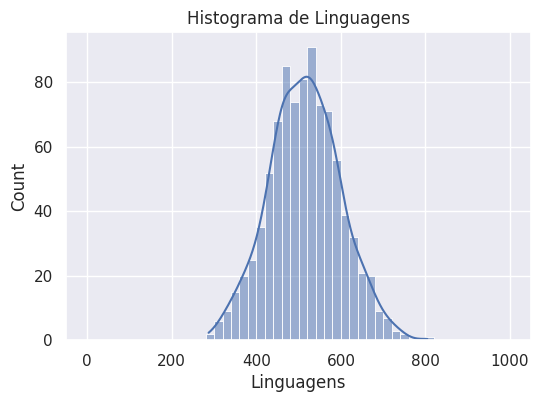

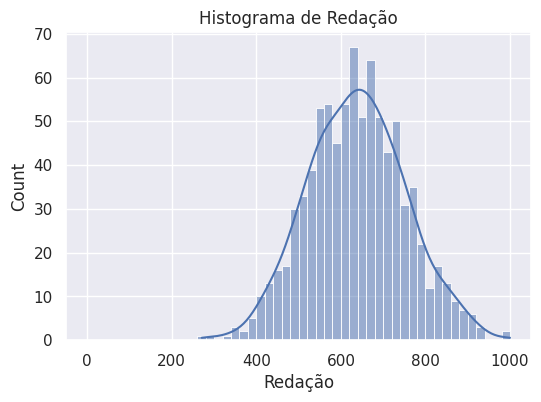

In [15]:
# histograma

plt.rcParams['figure.figsize'] = [6,4] #definindo o tamanho da figura através do dicionário global do Matplotlib
sns.set_theme() # configurando o tema visual dos gráficos gerados pelo Seaborn

disciplinas = ['Redação', 'Linguagens']

# Selecionando colunas numéricas somente das disciplinas selecionadas
colunas_selecionadas = [col for col in df.select_dtypes(include=np.number).columns if col in disciplinas]

for colunas in colunas_selecionadas:
  plt.figure()
  sns.histplot(data=df, x=colunas, kde=True, binwidth=20, binrange=[0, 1000])  # Criando histograma
  plt.title(f'Histograma de {colunas}')
  plt.show()

 **Análise com novo intervalo**

 A simetria ainda é válida uma vez que  as médias e medianas continuam próximas. Além disso, é possível observar que a curva de densidade (kde) permanece com uma distribuição quase idêntica de ambos os lados do centro, reforçando o resultado inicial simetria

### 8. Faça um boxplot para as notas de Ciências da Natureza e Redação, analisando os quartis e identificando possíveis outliers. Utilize o métodoIQR (Intervalo Interquartílico) para essa análise.

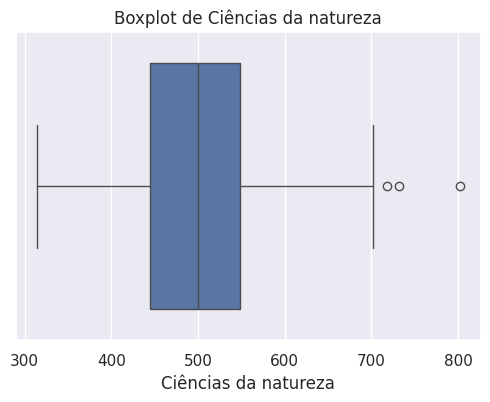

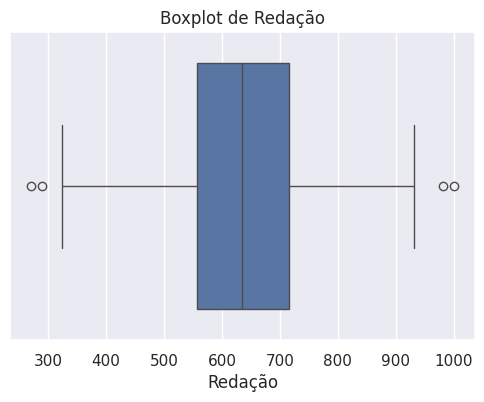

In [16]:
#plotando gráficos box

plt.rcParams['figure.figsize'] = [6,4]
sns.set_theme()

for coluna in ['Ciências da natureza', 'Redação']:
  plt.figure()
  sns.boxplot(data=df, x=coluna)
  plt.title(f'Boxplot de {coluna}')
  plt.show()


In [17]:

#função para calcular e identificar outliers

def iqr_outliers(df, coluna):
  q1 = df[coluna].quantile(0.25)
  q3 = df[coluna].quantile(0.75)
  iqr = q3 - q1

  #definindo cutoff para outliers
  cutoff = 1.5 * iqr

  #definindo limite inferior e superior
  limite_inferior = q1 - cutoff
  limite_superior = q3 + cutoff

  #criando lista para armazenar outliers e identificar a quantiad
  outliers = []

  for i in df[coluna]:
    if i < limite_inferior or i > limite_superior:
      outliers.append(i)

  return limite_inferior, limite_superior, outliers


Outliers detectados em  Ciências da natureza
O numero de outliers encontrado foi de 3
Representando 0.30%




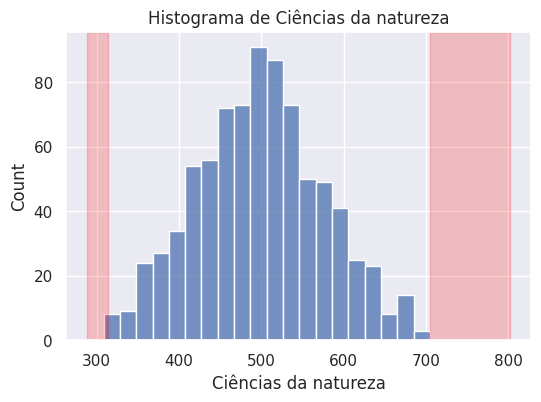


Outliers detectados em  Redação
O numero de outliers encontrado foi de 4
Representando 0.40%




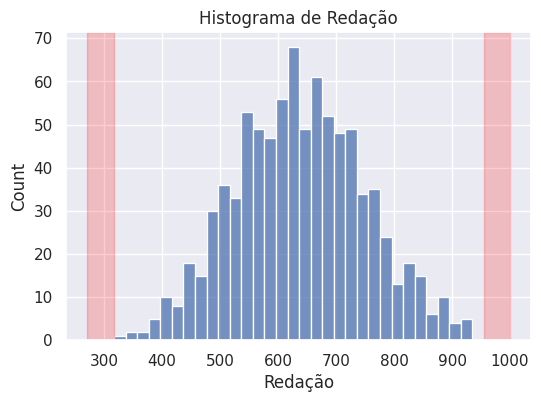

In [18]:
#Verificando os outliers das matérias selecionadas

disciplinas = ['Ciências da natureza', 'Redação']
colunas_selecionadas = [col for col in df.select_dtypes(include=np.number).columns if col in disciplinas]

for coluna in colunas_selecionadas:
  print(f'\nOutliers detectados em  {coluna}')
  lower, upper, out = iqr_outliers(df, coluna)
  print(f'O numero de outliers encontrado foi de', len(out))
  print(f'Representando {len(out)/len(df[coluna])*100:.2f}%')
  print(f'\n')
  plt.figure(figsize = (6,4))
  sns.histplot(data=df, x=coluna, kde=False, binwidth=20, binrange=[lower, upper])
  plt.axvspan(lower, df[coluna].min(), alpha=0.2, color='red')
  plt.axvspan(upper, df[coluna].max(), alpha=0.2, color='red')
  plt.title(f'Histograma de {coluna}')
  plt.show()


### 9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [19]:
#função para calcular e identificar outliers

from IPython.display import display #importa a função display() do módulo IPython.display.

def remove_outlier(df, coluna):
  limite_inferior, limite_superior, outliers = iqr_outliers(df, coluna)
  df_no_outliers = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
  return df_no_outliers

#Lista para materiais selecionadas na análise
colunas_selecionadas = [col for col in df.select_dtypes(include=np.number).columns if col not in ['media_ponderada']]
# Lista para armazenar os resultados
resultados = []

for coluna in colunas_selecionadas:

    # Aplicando a função para remover os outliers
    df_no_outliers = remove_outlier(df, coluna)
    media_original = df[coluna].mean()
    nova_media = df_no_outliers[coluna].mean()
    diff_medias = nova_media - media_original
    diff_medias_percentual = (diff_medias / media_original) * 100
    # Adicionando os resultados na lista
    resultados.append([coluna, media_original, nova_media, diff_medias, diff_medias_percentual])

# Criando um DataFrame com os resultados
df_resultados = pd.DataFrame(resultados, columns=['Disciplina', 'Média Original', 'Média Sem Outliers', 'Diferença', 'Variação (%)'])

# Exibir a tabela formatada
display(df_resultados)


,Disciplina,Média Original,Média Sem Outliers,Diferença,Variação (%)
0,Linguagens,514.524809,514.191148,-0.333661,-0.064848
1,Ciências humanas,527.042281,526.112618,-0.929663,-0.176393
2,Ciências da natureza,499.315583,498.396025,-0.919558,-0.184164
3,Matemática,535.965660,535.106244,-0.859416,-0.160349
4,Redação,637.783532,637.794010,0.010478,0.001643


**Conclusão**  A influência dos outliers na média nacional é mínima e não altera significativamente os resultados.A maior variação observada foi na disciplina Matemática (-0.27%), que ainda está muito abaixo do limite de 5%. Em Redação, houve um leve aumento de 0.10%, mas também sem impacto significativo.

### 10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [20]:
#Exibindo a contaegem de valores nulos desconsiderando a coluna de média pondera adicionada para uma analise especifica

df[[col for col in df.select_dtypes(include=np.number).columns if col not in ['media_ponderada']]].isna().sum()

,0
Linguagens,103
Ciências humanas,64
Ciências da natureza,176
Matemática,76
Redação,140


In [41]:
# Criando cópias do dataframe
df_media = df.copy()
df_mediana = df.copy()
df_moda = df.copy()

#criando uma lista para armazenar os resultados
resultados = []
#excluindo coluna de média ponderada da analise
colunas_selecionadas = df[[col for col in df.select_dtypes(include=np.number).columns if col not in ['media_ponderada']]]

# Iterando sobre as colunas numéricas
for coluna in colunas_selecionadas:
    media_coluna = df[coluna].mean()
    mediana_coluna = df[coluna].median()
    moda_coluna = df[coluna].mode()[0]  # Pegando o primeiro valor da moda, caso haja múltiplos
    # Adicionando os resultados na lista
    resultados.append([coluna, media_coluna, mediana_coluna, moda_coluna])

    # Substituindo os valores nulos corretamente
    df_media[coluna] = df_media[coluna].fillna(media_coluna)
    df_mediana[coluna] = df_mediana[coluna].fillna(mediana_coluna)
    df_moda[coluna] = df_moda[coluna].fillna(moda_coluna)

print(f'\n Os valores nulos foram substituidos com sucesso pelos valores: \n')
# Criando um DataFrame com os resultados
df_resultados = pd.DataFrame(resultados, columns=['Disciplina', 'Media', 'Mediana', 'Moda'])

# Exibir a tabela formatada
display(df_resultados)



 Os valores nulos foram substituidos com sucesso pelos valores: 



,Disciplina,Media,Mediana,Moda
0,Linguagens,514.524809,515.045250,287.000000
1,Ciências humanas,527.042281,524.519920,289.900000
2,Ciências da natureza,499.315583,500.479263,314.400000
3,Matemática,535.965660,533.247767,319.800000
4,Redação,637.783532,635.273973,270.839965


In [49]:
# Análise comparativa dos resultados

#armazenar os resultados originais
media_geral_original = df.mean(numeric_only=True).mean()
desvio_padrao_original = df.std(numeric_only=True).mean()

# criando lista para armazenar os resultados
resultados = []

#criando dicionário com os dataframes modificados
df_modificados = {"Média": df_media, "Mediana": df_mediana, "Moda": df_moda}

#calculando as estatisticas para cada um dos dataframes modificados

for metodo, df_mod in df_modificados.items():
  media_geral_mod = df_mod.mean(numeric_only=True).mean()
  desvio_padrao_mod = df_mod.std(numeric_only=True).mean()

  #calculando a diferença % entre os resultados
  diff_media = (media_geral_mod - media_geral_original) / media_geral_original *100
  diff_desvio = (desvio_padrao_mod - desvio_padrao_original) / desvio_padrao_original*100

  # Adicionando os resultados a uma lista
  resultados.append([metodo, media_geral_mod, desvio_padrao_mod, diff_media, diff_desvio])

# Criando DataFrame final
df_resultados = pd.DataFrame(resultados, columns=["Método", "Média Geral", "Desvio Padrão Geral", "Variação (%) Média", "Variação (%) Desvio"])

# Formatando as colunas de variação percentual para exibir apenas duas casas decimais
df_resultados["Variação (%) Média"] = df_resultados["Variação (%) Média"].map('{:.2f}%'.format)
df_resultados["Variação (%) Desvio"] = df_resultados["Variação (%) Desvio"].map('{:.2f}%'.format)

# Exibir resultados
display(df_resultados)

print(f'\n Variação em comparação com a média geral:{media_geral_original}')
print(f'\n Variação em comparação com o desvio padrão geral:{desvio_padrao_original}')




,Método,Média Geral,Desvio Padrão Geral,Variação (%) Média,Variação (%) Desvio
0,Média,544.047045,77.119300,-0.00%,-5.32%
1,Mediana,543.970226,77.121089,-0.01%,-5.32%
2,Moda,520.887379,102.411360,-4.26%,25.73%



 Variação em comparação com a média geral:544.0470449374693

 Variação em comparação com o desvio padrão geral:81.45329141045492


**Conclusão**
Com base nos resultados obtivos, observamos que:

* **Substituição nulos por média:** Apresenta a menor variação percentual na média geral, sendo o resultado de -0% indicando que a média original é preservada enquanto o desvio padrão de -5,32% indica uma redução na dispersão dos dados ao realizara substituição.

* **Substituição nulos por mediana:** Aqui a variação da média geral é muito pequena, 0,01% indicando que assim como na substituição pela média, o resultado é praticamente preservado. O desvio padrão apresenta o mesmo resultado que a substituilção pela média, com uma redução de 5,32% na disperção dos dados.

* **Substituição nulos por moda:** A variação significativa na média geral de -4,26% e no desvio padrão 25,73% indica que substituir valores nulos pela moda altera consideravelmente a distribuição dos dados.


Sendo assim, a Média é a melhor medida de tendência central para substituiçãode nulos nesse conjunto de dados especifico, considerando além dos resultados obtidos na substituição, a distribuição analisada nas etapas anteriores, onde pudemos obervar um histograma com distribuição de dados simétrica e poucos outliers identificados na base de dados.



